In [ ]:
# My laptop is out of service so I'm using google colab for now.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/usc/students/chuajaso"

/content/drive/MyDrive/usc/students/chuajaso


## Load pandas

In [ ]:
import pandas as pd

## Read a dataset
Try to choose a new dataset we haven't used in class. Preferably something you'll be using for your midterm project.

In [ ]:
# Lets ride into some Metro Bike Share Data, straight from the web

filename = "metro-trips-2021-q4.zip"
url = "https://11ka1d3b35pv1aah0c3m9ced-wpengine.netdna-ssl.com/wp-content/uploads/2022/01/metro-trips-2021-q4.zip"

# import requests
# request = requests.get(url, allow_redirects=True)
# open(filename, 'wb').write(request.content)

#DO NOT USE. SERVER DOES NOT LIKE SCRAPING

In [ ]:
# The file is zipped. Lets un-zip it

import zipfile
with zipfile.ZipFile("./"+filename, 'r') as zip_ref:
    zip_ref.extractall("./data")


In [ ]:
# Finally, the dataframe. All 62646 rows of data.

bike_trips = pd.read_csv("./data/metro-trips-2021-q4.csv")
bike_trips

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,169968837,16,9/1/2021 0:24,9/1/2021 0:40,4442,34.098000,-118.300468,4518,34.057968,-118.299751,20130,1,One Way,Walk-up,standard
1,169970937,19,9/1/2021 0:45,9/1/2021 1:04,4455,34.109360,-118.271812,4472,34.092602,-118.280930,16248,1,One Way,Walk-up,standard
2,169973037,8,9/1/2021 2:48,9/1/2021 2:56,3063,34.048038,-118.253738,3052,34.051102,-118.264557,13243,30,One Way,Monthly Pass,standard
3,169973038,24,9/1/2021 3:33,9/1/2021 3:57,3040,34.053570,-118.266357,3052,34.051102,-118.264557,6595,30,One Way,Monthly Pass,standard
4,169975138,9,9/1/2021 4:25,9/1/2021 4:34,3052,34.051102,-118.264557,3047,34.039982,-118.266403,13243,30,One Way,Monthly Pass,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62642,179408277,19,12/31/2021 23:29,12/31/2021 23:48,3033,34.040989,-118.255798,3011,34.041130,-118.267982,14027,1,One Way,One Day Pass,standard
62643,179408276,8,12/31/2021 23:40,12/31/2021 23:48,3031,34.044701,-118.252441,3030,34.051941,-118.243530,20006,365,One Way,Annual Pass,standard
62644,179409877,43,12/31/2021 23:47,1/1/2022 0:30,3031,34.044701,-118.252441,3031,34.044701,-118.252441,16214,1,Round Trip,Walk-up,standard
62645,179409876,42,12/31/2021 23:48,1/1/2022 0:30,3031,34.044701,-118.252441,3031,34.044701,-118.252441,13336,1,Round Trip,Walk-up,standard


## Explore the dataset using:
- Count the number of rows in your data with len()

- Sort your data with sort_values()

- Count values on a column using value_counts()

- Explore distributions with describe()

In [ ]:
# How many trips were taken in Q4 2021?

len(bike_trips)

62647

In [ ]:
# What was the longest duration trip (time)?

bike_trips.sort_values("duration", ascending=False)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
62646,179492474,1440,12/31/2021 23:48,1/2/2022 12:56,3030,34.051941,-118.243530,4491,34.047440,-118.247940,6117,1,One Way,One Day Pass,standard
58324,178780679,1440,12/17/2021 15:49,12/20/2021 16:46,4207,34.000881,-118.468910,4208,33.998680,-118.472977,5996,1,One Way,Walk-up,standard
9995,171250446,1440,9/17/2021 18:18,9/19/2021 13:29,4206,33.998341,-118.461014,4212,33.988129,-118.471741,6681,1,One Way,Walk-up,standard
49007,177107507,1440,11/24/2021 13:43,11/27/2021 8:20,3042,34.049301,-118.238808,3000,NaN,NaN,12223,1,One Way,One Day Pass,standard
44152,176413835,1440,11/14/2021 14:04,11/16/2021 12:59,4210,33.984341,-118.471550,4210,33.984341,-118.471550,20027,1,Round Trip,Walk-up,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26023,173347693,1,10/12/2021 17:12,10/12/2021 17:13,3005,34.048500,-118.258537,3005,34.048500,-118.258537,20076,30,Round Trip,Monthly Pass,standard
43001,176094710,1,11/12/2021 20:13,11/12/2021 20:14,4447,34.061600,-118.281990,4447,34.061600,-118.281990,5992,30,Round Trip,Monthly Pass,standard
48326,176906179,1,11/22/2021 19:14,11/22/2021 19:15,4480,34.058960,-118.250587,4480,34.058960,-118.250587,17487,365,Round Trip,Annual Pass,electric
5380,170596640,1,9/9/2021 19:31,9/9/2021 19:32,4245,34.024040,-118.283409,4245,34.024040,-118.283409,12345,30,Round Trip,Monthly Pass,standard


Looks like the longest trips are 1440 minutes, or 24 hours. Turns out trip length is capped at 24 hours. See https://bikeshare.metro.net/about/data/

In [ ]:
# How many trips are "Round Trips" i.e. start and end at the same station?
bike_trips["trip_route_category"].value_counts()

One Way       50684
Round Trip    11963
Name: trip_route_category, dtype: int64

In [ ]:
# How many trips are by pass holders?
bike_trips["passholder_type"].value_counts()

Monthly Pass    30995
Walk-up         17874
One Day Pass     6934
Annual Pass      6843
Name: passholder_type, dtype: int64

In [ ]:
# How many trips are on e-bikes?
bike_trips["bike_type"].value_counts()

standard    49656
electric    12922
smart          69
Name: bike_type, dtype: int64

In [ ]:
# What else is there?
bike_trips.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,6.264700e+04,62647.000000,62647.000000,62637.000000,62637.000000,62647.000000,61258.000000,61258.000000,62647.000000
mean,1.743279e+08,44.291874,3950.813574,34.031682,-118.335916,3930.446598,34.031530,-118.336539,55.718135
std,2.707986e+06,134.843592,651.057101,0.035260,0.092872,656.804724,0.034641,0.093631,110.077075
min,1.699688e+08,1.000000,3000.000000,33.928459,-118.491341,3000.000000,33.928459,-118.491341,1.000000
25%,1.719161e+08,8.000000,3063.000000,34.012520,-118.435204,3056.000000,34.014309,-118.435204,1.000000
50%,1.742212e+08,17.000000,4215.000000,34.040600,-118.285896,4215.000000,34.039982,-118.284561,30.000000
75%,1.767174e+08,32.000000,4509.000000,34.050480,-118.257591,4494.000000,34.049980,-118.257591,30.000000
max,1.794925e+08,1440.000000,4594.000000,34.179890,-118.225410,4594.000000,34.186569,-118.225410,365.000000


## Subset your dataframe based on a value, and assign it a new variable

In [ ]:
# Lets look only at electric bicycles
bike_trips_electric = bike_trips[bike_trips["bike_type"] == "electric"]
bike_trips_electric

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
17,169981466,16,9/1/2021 7:27,9/1/2021 7:43,3074,34.044170,-118.261169,3014,34.056610,-118.237213,17466,30,One Way,Monthly Pass,electric
32,169983653,16,9/1/2021 8:33,9/1/2021 8:49,3064,34.046131,-118.257591,3066,34.063389,-118.236160,16837,365,One Way,Annual Pass,electric
57,169988046,10,9/1/2021 10:14,9/1/2021 10:24,4483,34.100700,-118.259117,4478,34.104240,-118.273697,16939,30,One Way,Monthly Pass,electric
59,169988045,1,9/1/2021 10:25,9/1/2021 10:26,3014,34.056610,-118.237213,3014,34.056610,-118.237213,17317,30,Round Trip,Monthly Pass,electric
61,169988043,15,9/1/2021 10:28,9/1/2021 10:43,3014,34.056610,-118.237213,4491,34.047440,-118.247940,17466,30,One Way,Monthly Pass,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62621,179404483,15,12/31/2021 21:22,12/31/2021 21:37,4212,33.988129,-118.471741,4553,33.999580,-118.441360,16409,30,One Way,Monthly Pass,electric
62623,179417522,10,12/31/2021 21:36,12/31/2021 21:46,3064,34.046131,-118.257591,3000,NaN,NaN,18877,30,One Way,Monthly Pass,electric
62624,179404480,12,12/31/2021 21:38,12/31/2021 21:50,4553,33.999580,-118.441360,4547,33.989700,-118.448883,17479,30,One Way,Monthly Pass,electric
62626,179404478,19,12/31/2021 21:39,12/31/2021 21:58,3030,34.051941,-118.243530,3074,34.044170,-118.261169,19723,30,One Way,Monthly Pass,electric


In [ ]:
bike_trips_electric.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,1.292200e+04,12922.000000,12922.000000,12921.000000,12921.000000,12922.000000,12612.000000,12612.000000,12922.000000
mean,1.746583e+08,41.088609,3889.176830,34.038002,-118.318196,3866.731001,34.038022,-118.318357,61.789971
std,2.644162e+06,115.980826,686.133896,0.030213,0.084434,691.582500,0.030190,0.084497,108.968721
min,1.699815e+08,1.000000,3000.000000,33.928459,-118.491341,3000.000000,33.928459,-118.491341,1.000000
25%,1.723972e+08,10.000000,3046.000000,34.023392,-118.404030,3042.000000,34.023392,-118.404030,30.000000
50%,1.746276e+08,19.000000,4217.000000,34.045181,-118.271027,4215.000000,34.045181,-118.271523,30.000000
75%,1.769703e+08,30.000000,4512.000000,34.050880,-118.256668,4510.000000,34.050880,-118.256668,30.000000
max,1.794832e+08,1440.000000,4594.000000,34.110031,-118.225410,4594.000000,34.110031,-118.225410,365.000000


Looks e-bike trips tend to last longer than average, and are used more by pass holders with longer passes.

## Import another dataset with a common column (county name, fips code, etc)
Merge them and show the results


In [ ]:
# Station ID's are cool and unique, but lack substance. Lets merge with the station name dataset.

url = "https://bikeshare.metro.net/wp-content/uploads/2021/10/metro-bike-share-stations-2021-10-01.csv"

# Downloaded manually and avoid errors 😅

In [ ]:
# Make the dataframe
bike_stations = pd.read_csv("./data/metro-bike-share-stations-2021-10-01.csv", header=None)
bike_stations


,0,1,2,3,4
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active
...,...,...,...,...,...
343,4580,Centinela & Lucile,NaN,Westside,Active
344,4581,Playa Vista Library,2/2/2021,Westside,Active
345,4582,Westlawn & Beatrice,NaN,Westside,Active
346,4583,McConnell & Runway,11/17/2020,Westside,Active


In [ ]:
# Label the columns
bike_stations.columns = ["station_id", "station_name", "station_station_date", "station_area", "station_status"]
bike_stations

,station_id,station_name,station_station_date,station_area,station_status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active
...,...,...,...,...,...
343,4580,Centinela & Lucile,NaN,Westside,Active
344,4581,Playa Vista Library,2/2/2021,Westside,Active
345,4582,Westlawn & Beatrice,NaN,Westside,Active
346,4583,McConnell & Runway,11/17/2020,Westside,Active


In [ ]:
# Merge 
pd.merge(bike_trips, bike_stations,left_on="start_station", right_on="station_id")

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,station_id,station_name,station_station_date,station_area,station_status
0,169968837,16,9/1/2021 0:24,9/1/2021 0:40,4442,34.098000,-118.300468,4518,34.057968,-118.299751,20130,1,One Way,Walk-up,standard,4442,Normandie & Sunset,9/11/2019,DTLA,Active
1,170065873,11,9/2/2021 13:53,9/2/2021 14:04,4442,34.098000,-118.300468,4474,34.110031,-118.287163,20226,1,One Way,One Day Pass,standard,4442,Normandie & Sunset,9/11/2019,DTLA,Active
2,170326160,9,9/6/2021 7:47,9/6/2021 7:56,4442,34.098000,-118.300468,4472,34.092602,-118.280930,12015,30,One Way,Monthly Pass,standard,4442,Normandie & Sunset,9/11/2019,DTLA,Active
3,171110662,27,9/17/2021 13:49,9/17/2021 14:16,4442,34.098000,-118.300468,4482,34.094372,-118.331009,12408,1,One Way,Walk-up,standard,4442,Normandie & Sunset,9/11/2019,DTLA,Active
4,171185194,3,9/18/2021 16:50,9/18/2021 16:53,4442,34.098000,-118.300468,4406,34.101891,-118.300613,6597,30,One Way,Monthly Pass,standard,4442,Normandie & Sunset,9/11/2019,DTLA,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61851,172690598,6,10/5/2021 19:02,10/5/2021 19:08,4422,34.152142,-118.361954,4425,34.152000,-118.350601,16116,365,One Way,Annual Pass,standard,4422,Riverside & Cahuenga,8/5/2019,North Hollywood,Active
61852,173351083,23,10/12/2021 19:02,10/12/2021 19:25,4422,34.152142,-118.361954,4431,34.177650,-118.382309,15123,365,One Way,Annual Pass,smart,4422,Riverside & Cahuenga,8/5/2019,North Hollywood,Active
61853,172690580,22,10/5/2021 19:21,10/5/2021 19:43,4425,34.152000,-118.350601,4463,34.175671,-118.378967,16116,365,One Way,Annual Pass,standard,4425,Mariota & Riverside,8/5/2019,North Hollywood,Active
61854,172858332,7,10/7/2021 16:29,10/7/2021 16:36,4425,34.152000,-118.350601,4422,34.152142,-118.361954,15437,365,One Way,Annual Pass,smart,4425,Mariota & Riverside,8/5/2019,North Hollywood,Active


## Using GroupBy

Hi students: 
As I mentioned in class, I'd like for you to practice using the Pandas groupby() method for this week's assignment. You can either build on the notebook you used for the last assignment or start a new notebook. 
I'd like to see a few different groupby statements with different columns and/or aggregation methods (mean, sum, count, etc). 
Remember, you can refer back to our class notebooks for inspiration or guidance. Or check out this handy tutorial. 
The assigment will be do by 6pm Thurday, March 3.
Please let me know if you have questions!
Matt

In [ ]:
# What is the corelation of pass length to trip lengh?
bike_trips.groupby(["passholder_type"])["duration"].mean()

passholder_type
Annual Pass     15.447318
Monthly Pass    22.658816
One Day Pass    85.980675
Walk-up         76.678136
Name: duration, dtype: float64

In [ ]:
# What about trip duration and bike type?
bike_trips.groupby(["bike_type"])["duration"].mean()

bike_type
electric    41.088609
smart       53.782609
standard    45.112272
Name: duration, dtype: float64

In [ ]:
# What about trip duration and route catagory?
bike_trips.groupby(["trip_route_category"])["duration"].mean()

trip_route_category
One Way       38.069272
Round Trip    70.655354
Name: duration, dtype: float64

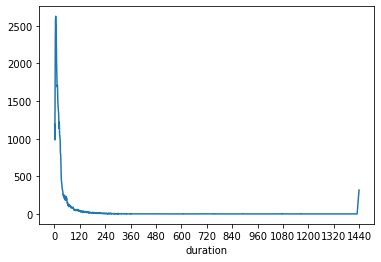

In [81]:
# The durations look a little long,
# especially since there is a charge for rides over 30 minutes.
# What is the distribution of trip durations?
bike_trips.groupby(["duration"])["trip_id"].count().plot(kind="line", xticks=range(0,1520,120))

In [ ]:
# Looks like most trips are below 500 minutes.
# I would call them short_trips, but tbh, these are:
reasonable_bike_trips = bike_trips[bike_trips["duration"] <= 500]
reasonable_bike_trips

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,169968837,16,9/1/2021 0:24,9/1/2021 0:40,4442,34.098000,-118.300468,4518,34.057968,-118.299751,20130,1,One Way,Walk-up,standard
1,169970937,19,9/1/2021 0:45,9/1/2021 1:04,4455,34.109360,-118.271812,4472,34.092602,-118.280930,16248,1,One Way,Walk-up,standard
2,169973037,8,9/1/2021 2:48,9/1/2021 2:56,3063,34.048038,-118.253738,3052,34.051102,-118.264557,13243,30,One Way,Monthly Pass,standard
3,169973038,24,9/1/2021 3:33,9/1/2021 3:57,3040,34.053570,-118.266357,3052,34.051102,-118.264557,6595,30,One Way,Monthly Pass,standard
4,169975138,9,9/1/2021 4:25,9/1/2021 4:34,3052,34.051102,-118.264557,3047,34.039982,-118.266403,13243,30,One Way,Monthly Pass,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62641,179407876,25,12/31/2021 23:03,12/31/2021 23:28,4516,34.045849,-118.254402,3033,34.040989,-118.255798,14027,1,One Way,One Day Pass,standard
62642,179408277,19,12/31/2021 23:29,12/31/2021 23:48,3033,34.040989,-118.255798,3011,34.041130,-118.267982,14027,1,One Way,One Day Pass,standard
62643,179408276,8,12/31/2021 23:40,12/31/2021 23:48,3031,34.044701,-118.252441,3030,34.051941,-118.243530,20006,365,One Way,Annual Pass,standard
62644,179409877,43,12/31/2021 23:47,1/1/2022 0:30,3031,34.044701,-118.252441,3031,34.044701,-118.252441,16214,1,Round Trip,Walk-up,standard


In [ ]:
# Same question, on reasonable trips:
# What is the corelation of pass length to trip lengh?
reasonable_bike_trips.groupby(["passholder_type"])["duration"].mean()

passholder_type
Annual Pass     13.651677
Monthly Pass    19.341133
One Day Pass    55.676261
Walk-up         47.249598
Name: duration, dtype: float64

It looks like One Day Pass holders tend to have the longest trips.

In [ ]:
# What is the breakdown of passholder and trips?
bike_trips.groupby(["passholder_type"])["trip_id"].count()

passholder_type
Annual Pass      6843
Monthly Pass    30995
One Day Pass     6934
Walk-up         17874
Name: trip_id, dtype: int64

In [ ]:
# Which passholder class has the most unreasonable trips?
unreasonable_bike_trips = bike_trips[bike_trips["duration"] > 500]
unreasonable_bike_trips.groupby(["passholder_type"])["trip_id"].count()

passholder_type
Annual Pass      16
Monthly Pass     98
One Day Pass    194
Walk-up         482
Name: trip_id, dtype: int64

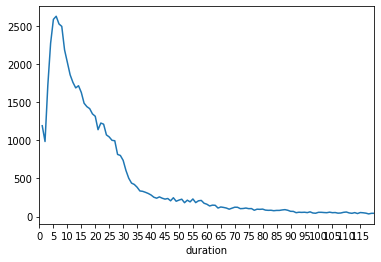

In [89]:
# What is the distribution of really trip durations?
bike_trips[bike_trips["duration"] <= 120].groupby(["duration"])["trip_id"].count().plot(kind="line", xticks=range(0,120,5), xlim=[0,120])

In [90]:
# What about trip duration and bike type on reasonable trips?
reasonable_bike_trips.groupby(["bike_type"])["duration"].mean()

bike_type
electric    31.029306
smart       41.058824
standard    30.370971
Name: duration, dtype: float64